In [3]:
# importing the required library 
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def simulate_input(m,n,d):
    # this function randomy generate the design matrix A, vector x, and binarized vector of their product y
    x = np.zeros(n) #Here we generate zeros
    x[:d] = 1 #turn some of zeros into ones, the portion is specified by d  
    np.random.shuffle(x) # the shuffle function places these one randomly
    #x = np.array(a, dtype = bool) you do not need this
    A = np.mod(np.random.permutation(m*n).reshape(m,n),2) # random bianry matrix  
    u = np.dot(A,x)# the product of A and x
    y = np.sign(u)  # binary of the product
    return A, x, y

In [5]:
def prunc(x, k):
    #This function takes a vector x and returns a vector xk with the k largest
    #in magnitude entries of x not set to zero
    indices = np.argsort(np.abs(x))[::-1]
    largest = indices[0:k]
    #print(largest)
    xk = np.zeros(len(x))
    for kl in largest:
        xk[kl] = x[kl]
    return xk

In [6]:
def biht(A, y, d):
    # This function performs one-bit compressive sensing via the Binary Iterative Hard Thresholding algorithm and returns the recoverd vector x_bar
    m, n = A.shape
    x_bar = np.zeros(n)
    tau = 0.1 # step size for gradient update
    tol = 10E-16 # stoping criteria 
    i = 0 
    while i < 1000:
        i = i+1
        dif = y - np.sign(np.dot(A, x_bar))
        temp = x_bar + (tau/2)*np.dot(np.transpose(A), dif)
        x1 = prunc(temp, d)
        err = np.subtract(x1, x_bar)
        assert(x1.shape == x_bar.shape)
        #print(err, np.linalg.norm(np.abs(err)))
        if np.linalg.norm(np.abs(err)) < tol:
            break
        x_bar = x1

    x_bar = [1.0 if x_bar[i] > 0 else 0.0 for i in range(len(x_bar))]
    return np.array(x_bar)

In [78]:
n  = 512
m = 20
d = 4
co = []
for i in range(1000): 
    A, x, y = simulate_input(m, n ,d)
    xbar = biht(A, y, d)
    #print(x)
    #print(xbar)
    count = 0
    for j in range(len(xbar)):
        if xbar[j] != x[j]: 
            count = count+1
    co.append(count)

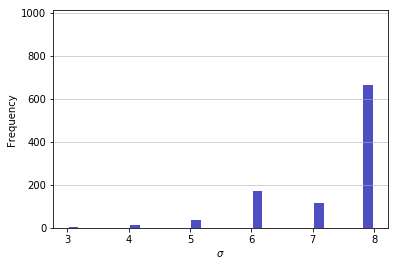

In [79]:
plt.hist(co,bins='auto', color='#0504aa', alpha=0.7, rwidth=0.8)
plt.grid(axis='y', alpha=0.7)
plt.xlabel('$\sigma$')
plt.ylabel('Frequency')
plt.title('')
maxfreq = len(co)
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show() 

In [ ]:
"""Here this a histogram of 3000 iterations when m,n,d are fixed"""
n, bins, patches = plt.hist(x=plot(7,14,2,1000, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\sigma$')
plt.ylabel('Frequency')
plt.title('')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

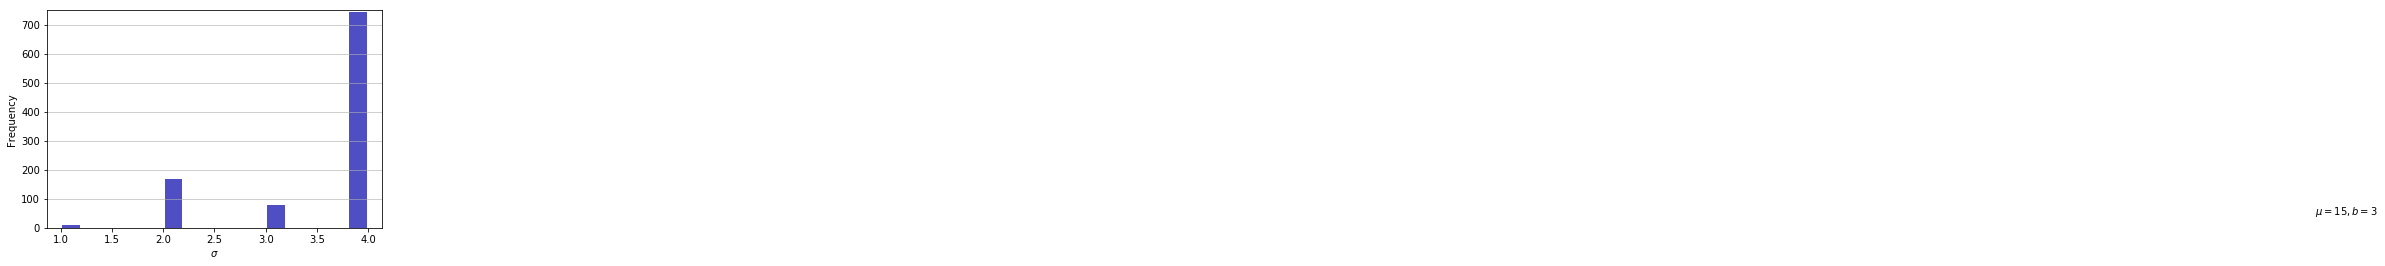

In [65]:
"""Here this a histogram of 3000 iterations when m,n,d are fixed"""
n, bins, patches = plt.hist(x= co, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\sigma$')
plt.ylabel('Frequency')
plt.title('')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

In [8]:
# examples 
# This is an example of no. of exactly recovered vs m
#A, x, y = simulate_input(20, 100, 2)
#xbar = biht(A,y, 2)
exa =[]
faln = []
falp = []
d = 4 # assume there are only d defectives
n = 100 # the total number of individuals being tested
#m = number of tests

for m in np.arange(10,n,5):
  count = 0
  neg = 0 
  pos = 0 
  for k in np.arange(100):
        A, x, y = simulate_input(m, n, d)
        xbar = biht(A,y,d)
        if (xbar==x).all() == True:
            count = count+1
        #exa.append(count)
  
        else: 
             for i in range(len(xbar)):
                if xbar[i] < x[i]:
                    neg = neg+1
                      #faln.append(neg)
                elif xbar[i] > x[i]: 
                    pos = pos+1
                      #falp.append(pos)
  exa.append(count/100)
  faln.append(neg/100)
  falp.append(pos/100)

#print(exa)
#print(faln)
#print(falp)

In [8]:
print(len(faln))

101


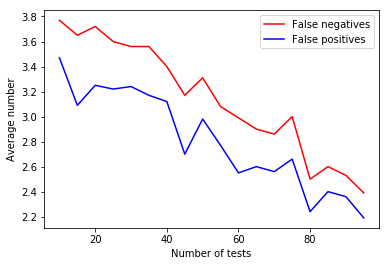

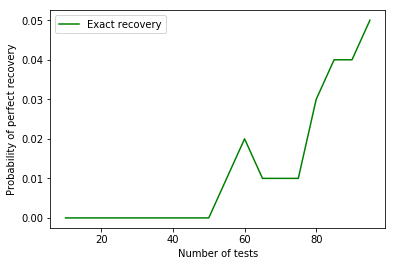

In [9]:
x = np.arange(10,n,5)
# plot of false positive and false negatives 
plt.plot(x,faln,'r', label = 'False negatives')
plt.plot(x,falp, 'b', label = 'False positives')
plt.xlabel('Number of tests')
plt.ylabel('Average number')
#plt.title("The number of exactly recovered vectors vs different values of m")
plt.legend()
plt.show()

#  separate plot for the exact recovery 
plt.plot(x,exa, 'g', label = "Exact recovery")
plt.xlabel('Number of tests')
plt.ylabel('Probability of perfect recovery')
plt.legend()
plt.show()